In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df3 = pd.read_csv("humongo.csv")
df3.rename(columns={'2023_rev': 'rev_2023'}, inplace=True)
df3.head()

csa_name_mod2_x  company_id           company_name_x  \
0     All Other Markets Combined        1458             Slogaway LLC   
1       Dallas-Fort Worth, TX-OK        1505          Pronto Delivery   
2        Las Vegas-Henderson, NV        1992  Trailhound Smoker's BBQ   
3  Salt Lake City-Provo-Orem, UT        2050   Magic Man Junk Removal   
4     All Other Markets Combined        2440              Sloppy Crab   

   shift_lead_time_fs  head_count_requested_fs  head_count_worked_fs  \
0                   3                        2                     1   
1                   5                        1                     1   
2                  14                        8                    10   
3                   4                        2                     2   
4                   3                        1                     1   

   fill_rate_fs  total_shifts_f30d  total_head_count_minus_fs  \
0          0.50                  1                          0   
1          1.00                 18                         27   
2          1.25                  1                          4   
3          1.00                  1                          3   
4          1.00                 10                         46   

   total_head_count_minus_f30d  ... adjusted_head_count  fill_rate  \
0                            0  ...                 NaN        NaN   
1                           10  ...                 NaN        NaN   
2                          -68  ...                 NaN        NaN   
3                            1  ...                 5.0     1.0000   
4                            7  ...                37.0     0.9189   

   industry_name  avg_head_count  avg_hourly_wage  avg_shift_lead rev_2023  \
0            NaN             NaN              NaN             NaN      NaN   
1            NaN             NaN              NaN             NaN      NaN   
2            NaN             NaN              NaN             NaN      NaN   
3       Delivery          1.6667        20.000000          1.0000   154.30   
4  Food Services          1.5161        14.870968          6.6512  1329.57   

  avg_days_between_shifts  total_head_count  year_quarter_comp_start_y  
0                     NaN               NaN                     2022Q3  
1                     NaN               NaN                     2022Q4  
2                     NaN               NaN                     2022Q3  
3                 79.5000               5.0                     2023Q2  
4                  3.3478              47.0                     2023Q2  

[5 rows x 29 columns]

In [4]:
# Select relevant columns (excluding year_quarter_comp_start)
selected_columns = [shift_lead_time_fs,
head_count_requested_fs,
head_count_worked_fs,
fill_rate_fs,
total_shifts_f30d,
total_head_count_minus_fs,
total_head_count_minus_f30d,
head_count_worked_f30d,
head_count_requested_f30d,
fill_rate_f30d,
shifts_worked_f30d,
avg_days_between_shifts_f30d,
shifts_worked,
adjusted_head_count,
fill_rate,
avg_head_count,
avg_hourly_wage,
avg_shift_lead,
rev_2023,
avg_days_between_shifts,
total_head_count]
df3_selected = df3[selected_columns]

# Filter data for each year_quarter_comp_start
df3_2022Q3 = df3[df3['year_quarter_comp_start'] == '2022Q3'][selected_columns]
df3_2022Q4 = df3[df3['year_quarter_comp_start'] == '2022Q4'][selected_columns]
df3_2023Q1 = df3[df3['year_quarter_comp_start'] == '2023Q1'][selected_columns]
df3_2023Q2 = df3[df3['year_quarter_comp_start'] == '2023Q2'][selected_columns]

# Filter data for each csa_name_mod2
df3_aomc = df3[df3['csa_name_mod2'] == 'All Other Markets Combined'][selected_columns]
df3_dfw = df3[df3['csa_name_mod2'] == 'Dallas-Fort Worth, TX-OK'][selected_columns]
df3_lvh = df3[df3['csa_name_mod2'] == 'Las Vegas-Henderson, NV'][selected_columns]
df3_slc = df3[df3['csa_name_mod2'] == 'Salt Lake City-Provo-Orem, UT'][selected_columns]

# Convert numeric columns to float (optional, if not already)
numeric_columns = df3_selected.columns[df3_selected.dtypes.apply(lambda x: np.issubdtype(x, np.number))]
df3_selected[numeric_columns] = df3_selected[numeric_columns].astype(float)

# Create a correlation matrix for the entire dataset
corr3_all = df3_selected.corr()

# Create a correlation matrix for each category
corr3_2022Q3 = df3_2022Q3.corr()
corr3_2022Q4 = df3_2022Q4.corr()
corr3_2023Q1 = df3_2023Q1.corr()
corr3_2023Q2 = df3_2023Q2.corr()

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Set an overall title for the entire grid
fig.suptitle('First Shift Effect by Company Start Quarter', fontsize=16)

# Plot the correlation heatmaps for each category
sns.heatmap(corr3_2022Q3, annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('2022Q3')

sns.heatmap(corr3_2022Q4, annot=True, cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('2022Q4')

sns.heatmap(corr3_2023Q1, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('2023Q1')

sns.heatmap(corr3_2023Q2, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('2023Q2')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space for the overall title

# Show the plot
plt.show()

NameError: name 'shift_lead_time_fs' is not defined

C:\Users\annab\AppData\Local\Temp\ipykernel_10748\2857753918.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[selected_columns][numeric_columns] = df3[selected_columns][numeric_columns].astype(float)


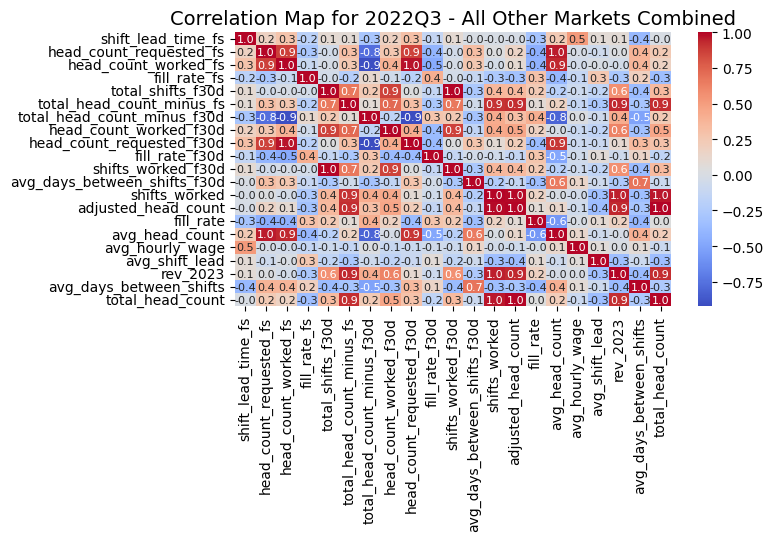

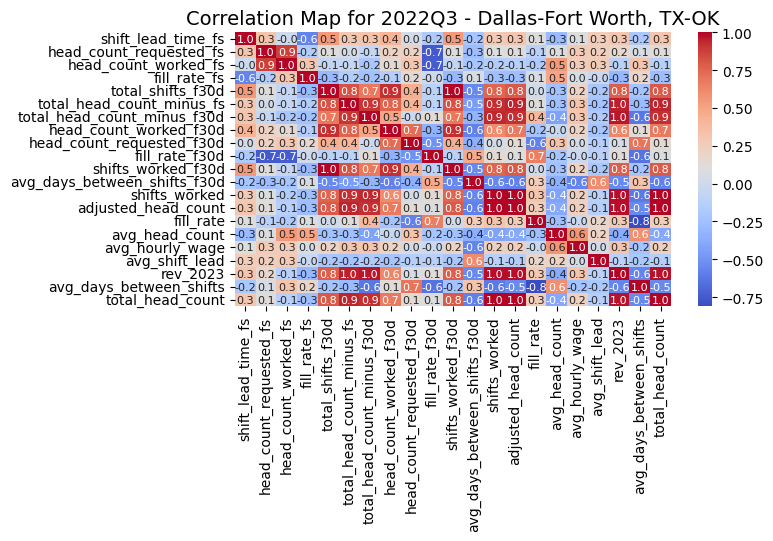

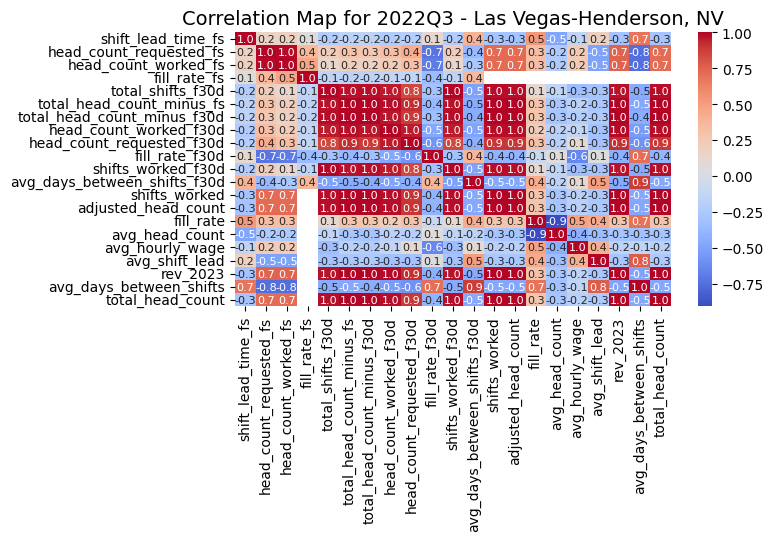

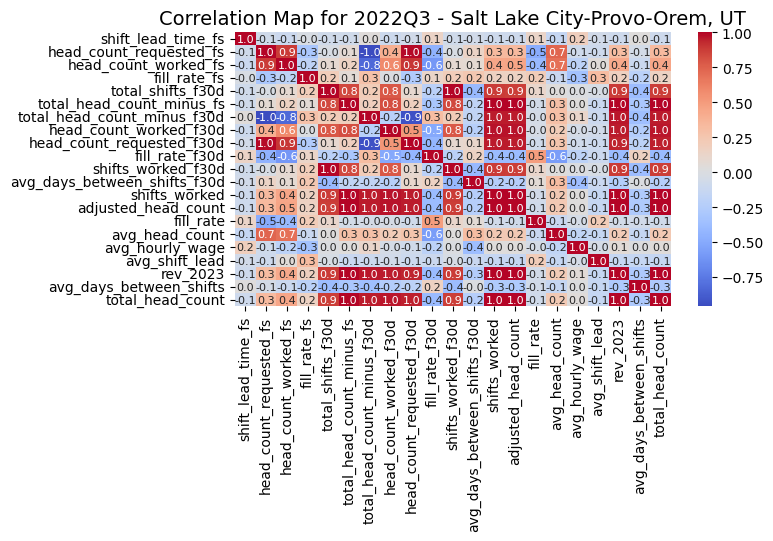

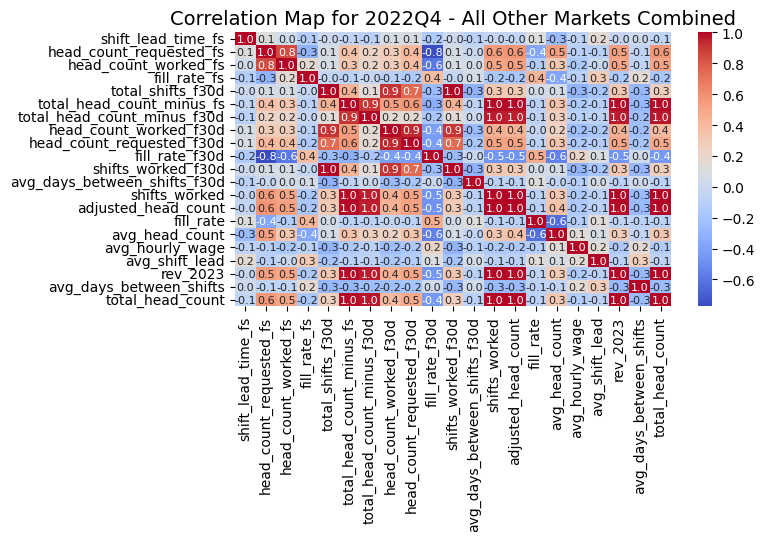

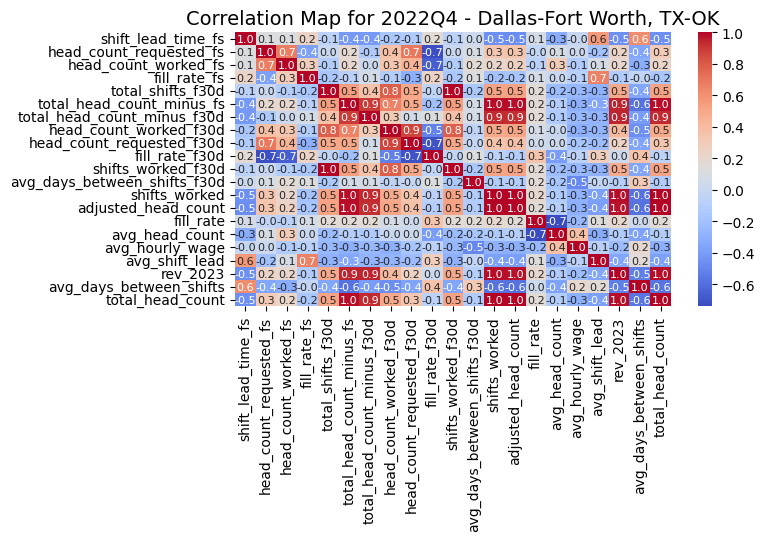

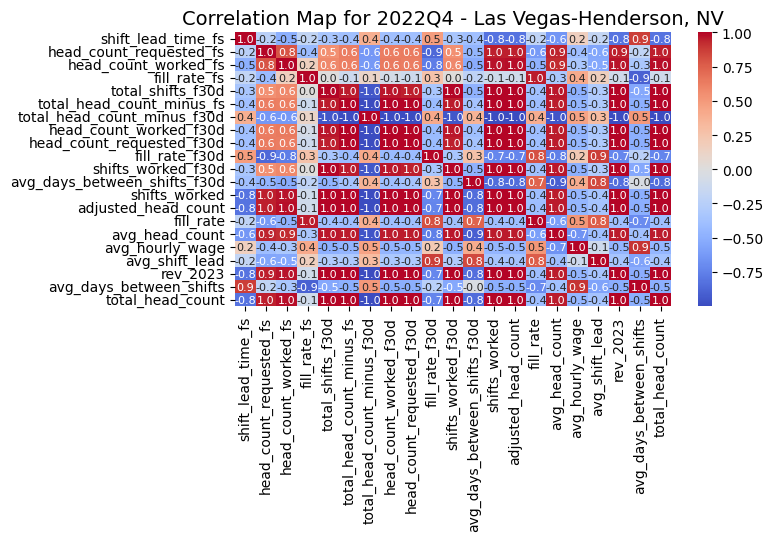

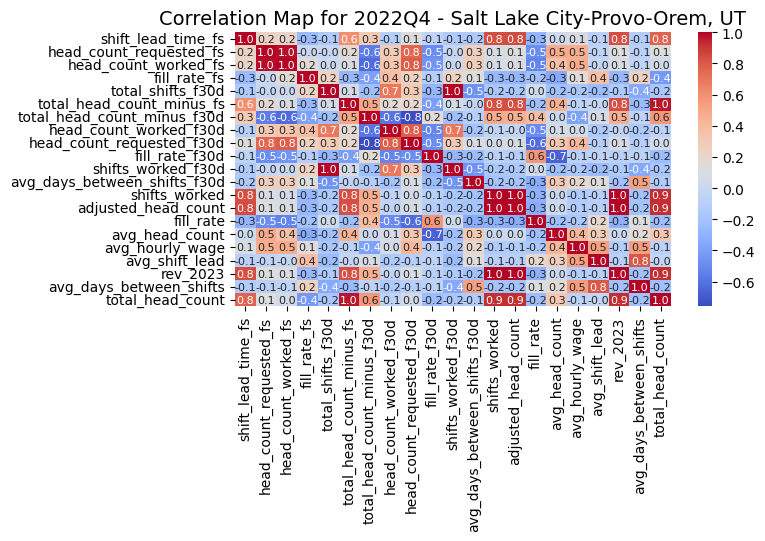

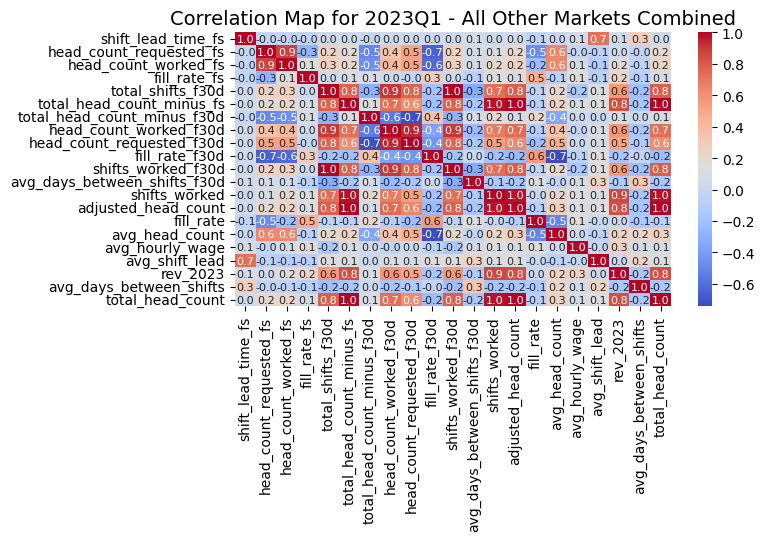

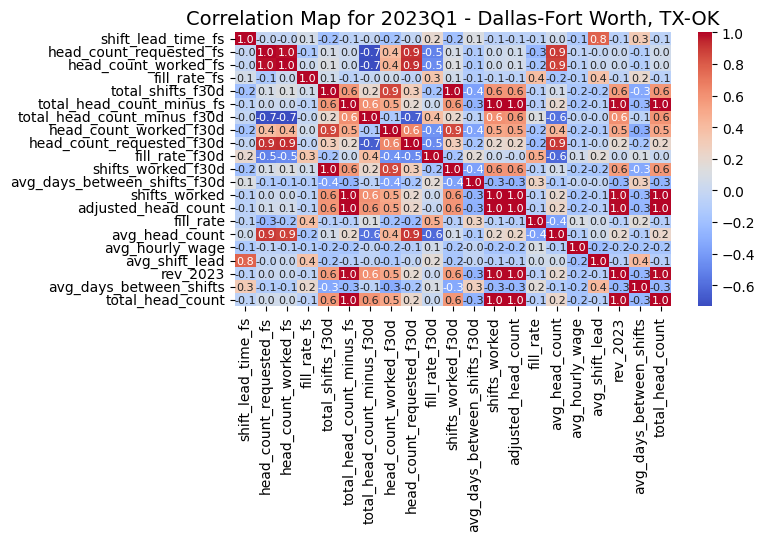

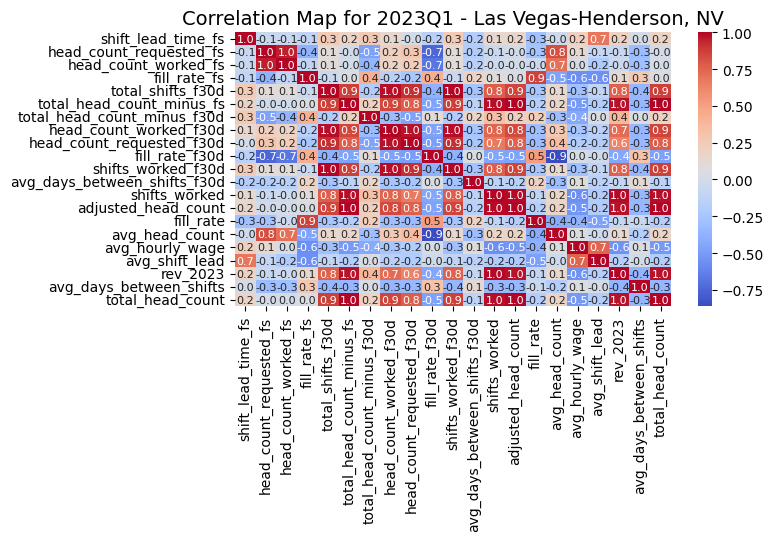

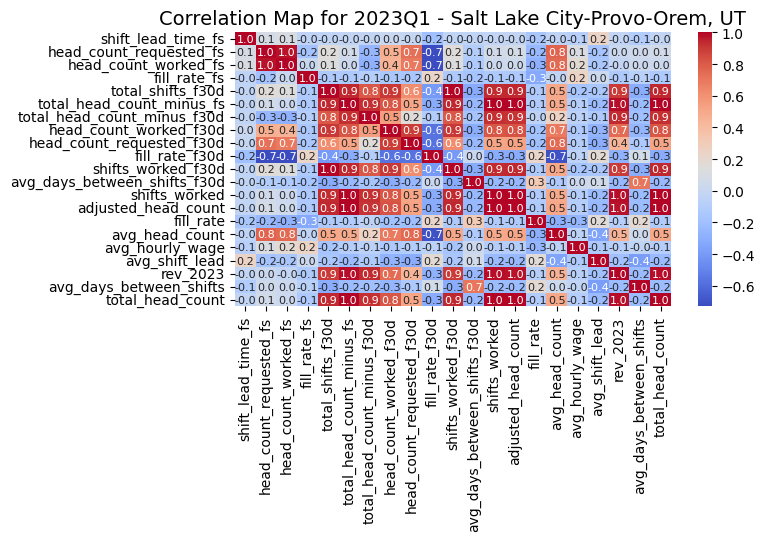

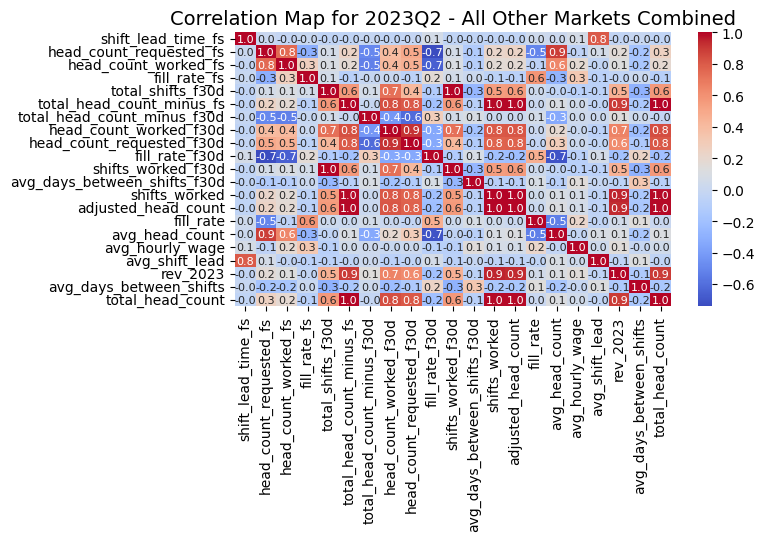

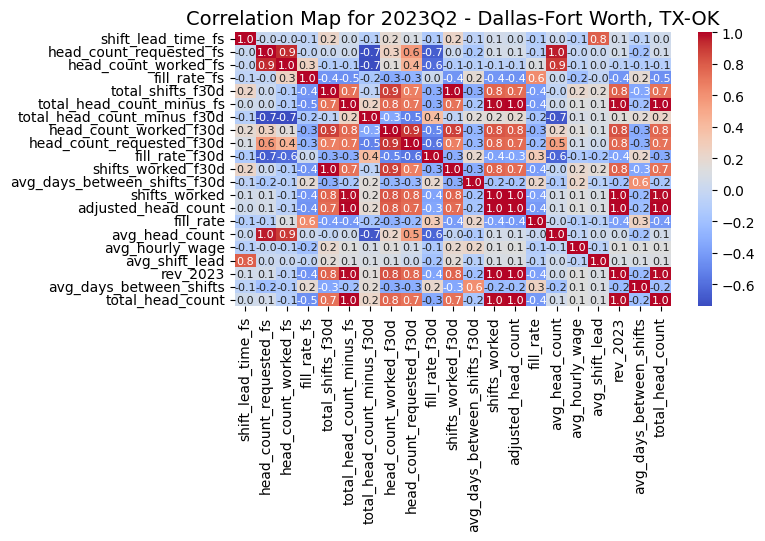

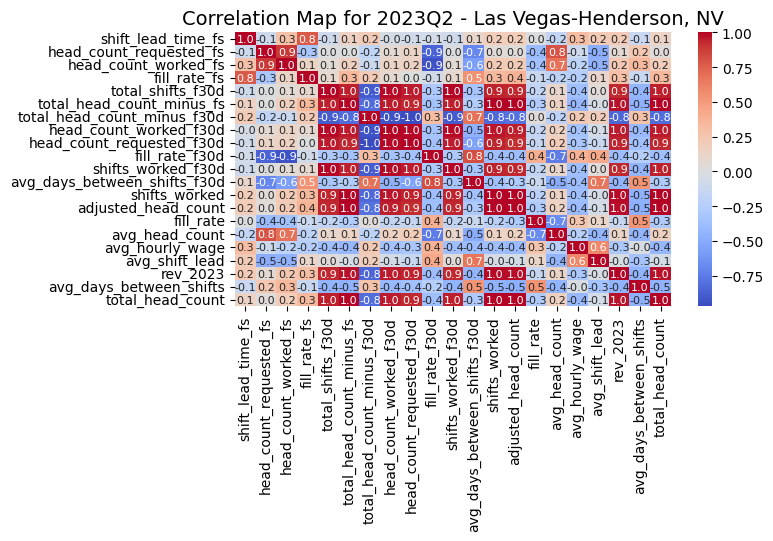

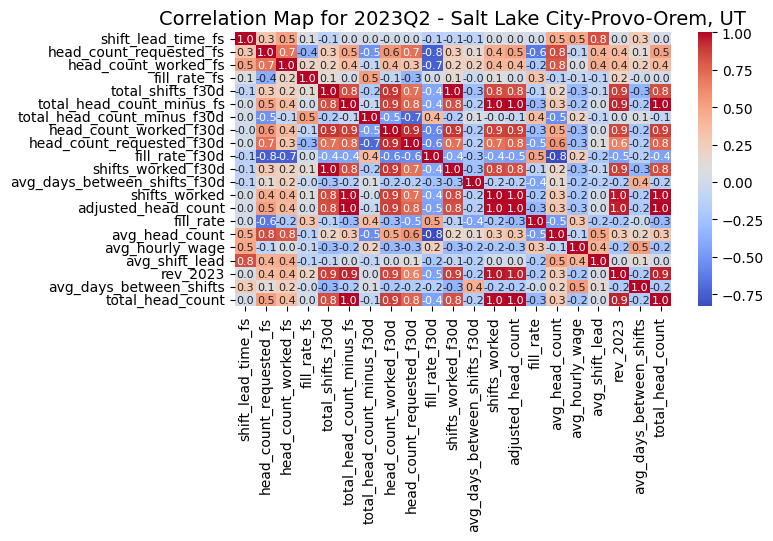

In [14]:
# Assuming df3 is your DataFrame
# ... (your previous code to read data and other initializations)

# Define relevant columns
selected_columns = ['shift_lead_time_fs', 'head_count_requested_fs', 'head_count_worked_fs', 'fill_rate_fs', 'total_shifts_f30d', 'total_head_count_minus_fs', 'total_head_count_minus_f30d', 'head_count_worked_f30d', 'head_count_requested_f30d', 'fill_rate_f30d', 'shifts_worked_f30d', 'avg_days_between_shifts_f30d', 'shifts_worked',
'adjusted_head_count', 'fill_rate', 'avg_head_count', 'avg_hourly_wage', 'avg_shift_lead', 'rev_2023', 'avg_days_between_shifts', 'total_head_count']
# (Your list of column names)

# Convert numeric columns to float (optional, if not already)
numeric_columns = df3[selected_columns].columns[df3[selected_columns].dtypes.apply(lambda x: np.issubdtype(x, np.number))]
df3[selected_columns][numeric_columns] = df3[selected_columns][numeric_columns].astype(float)

# Define unique values for year_quarter_comp_start and csa_name_mod2
quarters = ['2022Q3', '2022Q4', '2023Q1', '2023Q2']
csa_names = ['All Other Markets Combined', 'Dallas-Fort Worth, TX-OK', 'Las Vegas-Henderson, NV', 'Salt Lake City-Provo-Orem, UT']

# Create 16 separate heatmaps
for quarter in quarters:
    for csa_name in csa_names:
        # Filter data for the current combination of quarter and csa_name
        current_df = df3[(df3['year_quarter_comp_start_x'] == quarter) & (df3['csa_name_mod2_x'] == csa_name)][selected_columns]
        
        # Create a correlation matrix for the current combination
        current_corr = current_df.corr()
        
        # Set up the matplotlib figure
        fig, ax = plt.subplots(figsize=(8, 6))

        # Set a title for the heatmap
        ax.set_title(f'Correlation Map for {quarter} - {csa_name}', fontsize=14)

        # Plot the correlation heatmap with adjusted font size and format
        sns.heatmap(current_corr, annot=True, cmap='coolwarm', ax=ax, annot_kws={"size": 8}, fmt=".1f")

        # Adjust layout
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space for the title

        # Show the plot for the current combination
        plt.show()